<a href="https://colab.research.google.com/github/GabrielGriseli/PLN_FALE_UFMG/blob/main/1/1_expressoes_regulares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expressões Regulares

* Método mais simples para processamento de texto
* Sequência de caracteres que define um padrão de busca
* Pode ser usado para:
  * Buscar por substrings (e.g. palavras, expressões) num texto
  * Busca por sequências de caracteres que seguem um determinado padrão:
    * Palavras finalizadas em "ei" ou "ando"; padrões de CEP (e.g. XXXXX-XXX), data (e.g., XX/XX/XXXX), etc.

## Exemplo 1

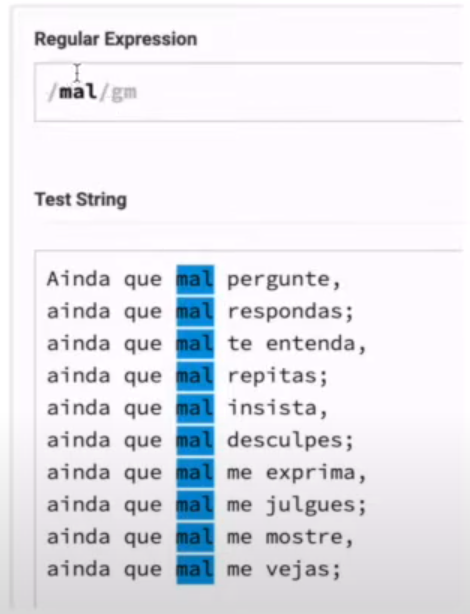

**URL:** https://www.regexpal.com/

Busca por todas as sequências de caracteres "mal" em parte do poema "Ainda que mal" de Carlos Drummond de Andrade

### Exemplo 1 em Python

In [1]:
import re

poema = """Ainda que mal pergunte,
ainda que mal respondas;
ainda que mal te entenda,
ainda que mal repitas;
ainda que mal insista,
ainda que mal desculpes;
ainda que mal me exprima,
ainda que mal me julgues;
ainda que mal me mostre,
ainda que mal me vejas;"""

re.findall(r"mal", poema)

['mal', 'mal', 'mal', 'mal', 'mal', 'mal', 'mal', 'mal', 'mal', 'mal']

* Em Python, a biblioteca "re" é utilizada para definir expressões regulares
* Seu método *findall* retorna todas as ocorrências de um padrão numa determinada string de entrada

## Disjunção

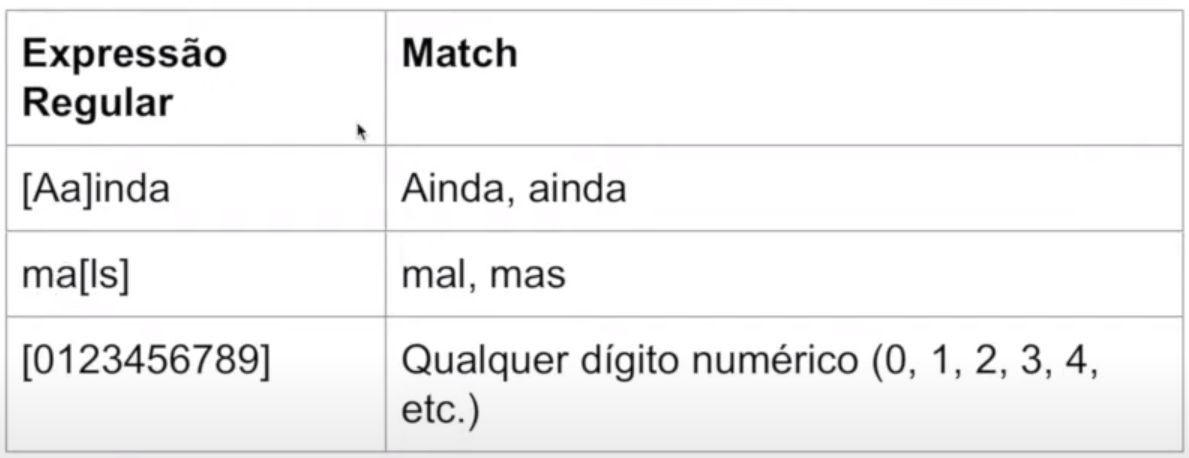

* Forma de definir mais de um caractere possível numa posição da expressão regular
* Definida entre colchetes (**[]**)

In [2]:
import re

poema = """Ainda que mal pergunte,
ainda que mal respondas;
ainda que mal te entenda,
ainda que mal repitas;
ainda que mal insista,
ainda que mal desculpes;
ainda que mal me exprima,
ainda que mal me julgues;
ainda que mal me mostre,
ainda que mal me vejas;"""

re.findall(r"[Aa]inda que mal", poema)

['Ainda que mal',
 'ainda que mal',
 'ainda que mal',
 'ainda que mal',
 'ainda que mal',
 'ainda que mal',
 'ainda que mal',
 'ainda que mal',
 'ainda que mal',
 'ainda que mal']

## Disjunção e Intervalos

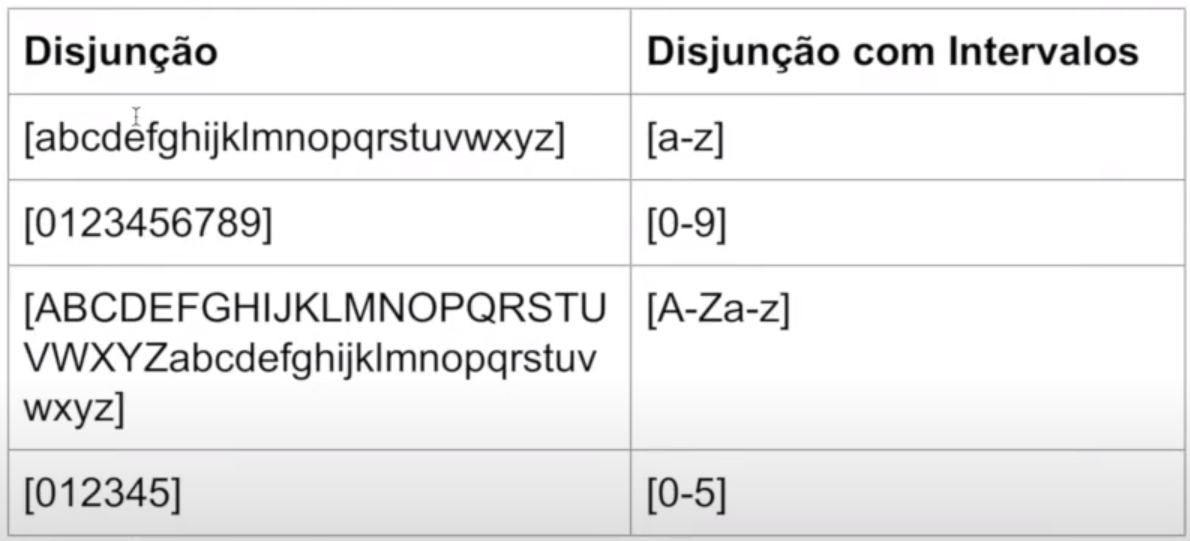

Intervalos podem ser definidos para representar disjunção de longas sequências de caracteres e dígitos.

In [3]:
import re

descricao = """Smart TV LED 43" LG 43UJ6525 Ultra HD 4K com Conversos Digital 4 HDMI 2 USB WebOS 3.5 Painel Ips HDR e
Smartphone Motorola Moto G 5S Dual Chip Android 7.1.1 Nougat Tela 5.2" Snapdragon 430 32GB 4G Câmera 16MP - Platinum"""

re.findall(r"[0-9]", descricao)

['4',
 '3',
 '4',
 '3',
 '6',
 '5',
 '2',
 '5',
 '4',
 '4',
 '2',
 '3',
 '5',
 '5',
 '7',
 '1',
 '1',
 '5',
 '2',
 '4',
 '3',
 '0',
 '3',
 '2',
 '4',
 '1',
 '6']

## Negação na Disjunção

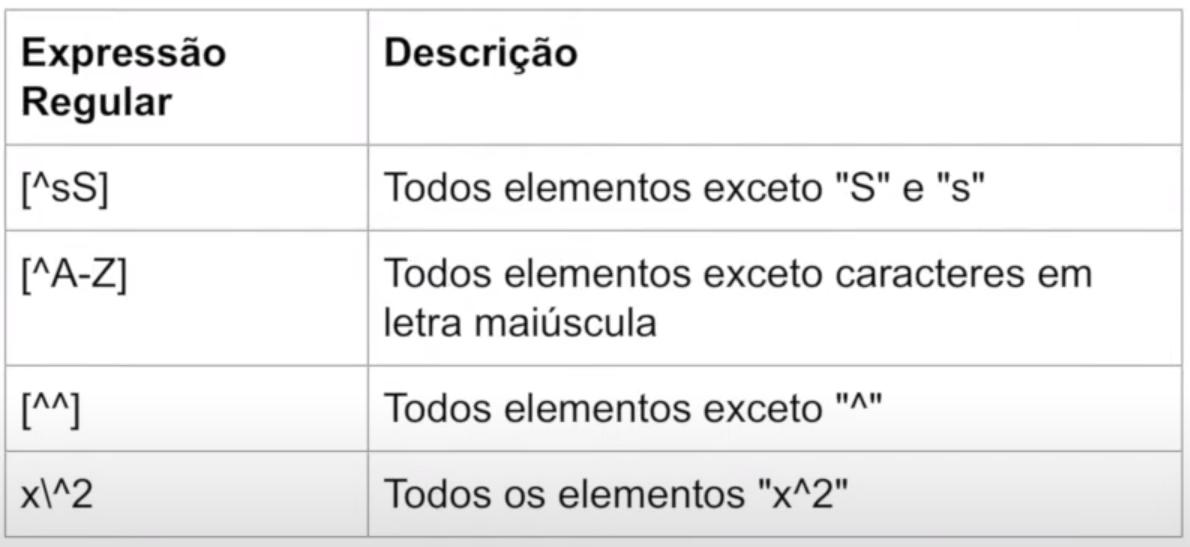

* Negação de elementos pode ser definido pelo símbolo **"^"** entre colchetes (**[]**)
* Observe que "^" só tem função de negação caso dentro dos colchetes

In [4]:
import re

poema = """Eu sou aquela mulher
a quem o tempo
muito ensinou.
Ensinou a amar a vida.
Não desistir da luta.
Recomeçar na derrota."""

re.findall(r"[^a-z]", poema)

['E',
 ' ',
 ' ',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 '\n',
 ' ',
 '.',
 '\n',
 'E',
 ' ',
 ' ',
 ' ',
 ' ',
 '.',
 '\n',
 'N',
 'ã',
 ' ',
 ' ',
 ' ',
 '.',
 '\n',
 'R',
 'ç',
 ' ',
 ' ',
 '.']

## Múltiplos Padrões de Busca

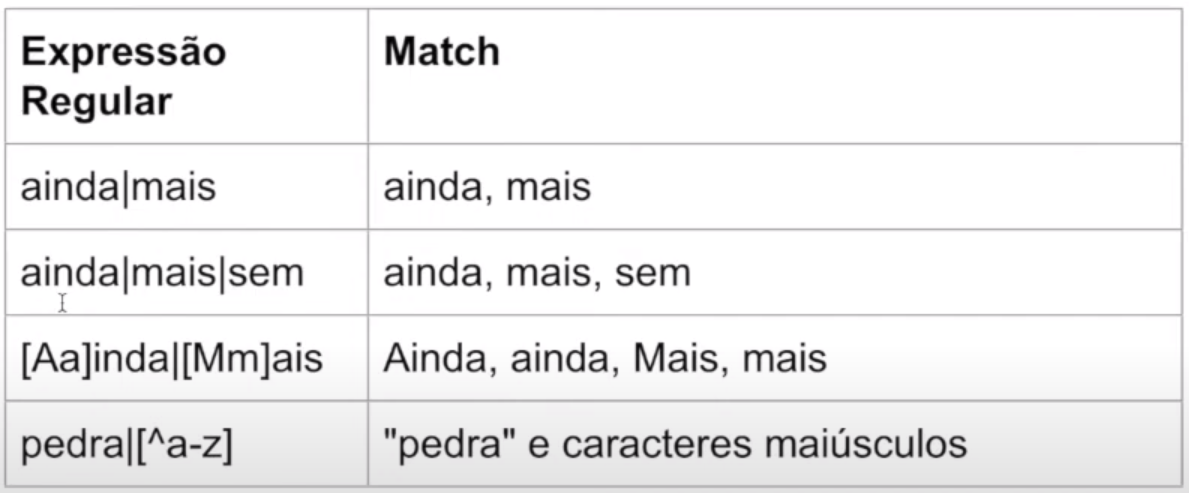

Múltiplos padrões de busca podem ser definidos desde que separados com o comando **"|"**

In [14]:
import re

poema =  """No meio do caminho tinha uma pedra
Tinha uma pedra no meio do caminho
Tinha uma pedra
No meio do caminho tinha uma pedra"""

re.findall(r"pedra|[Tt]inha", poema)

['tinha', 'pedra', 'Tinha', 'pedra', 'Tinha', 'pedra', 'tinha', 'pedra']

## Marcadores de Início e Fim de Linha

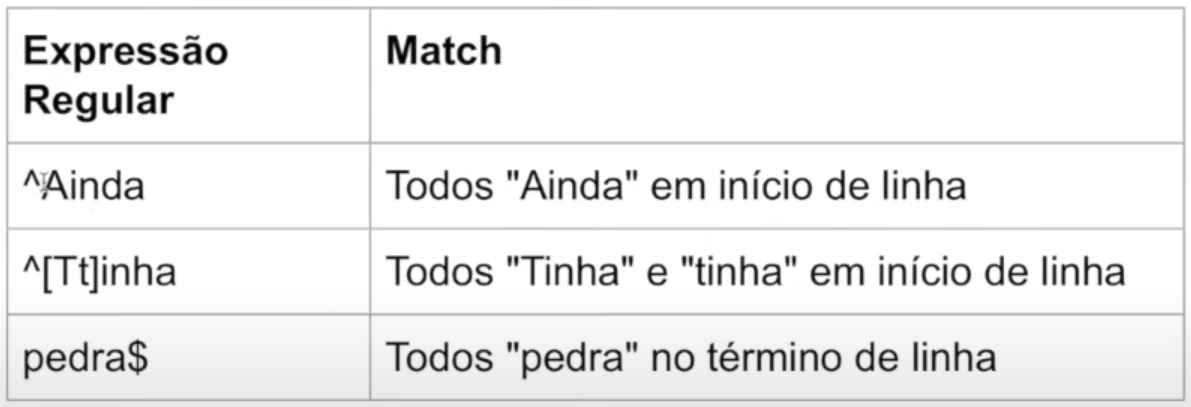

Início e fim de linha podem ser marcados numa expressão regular pelos caracteres especiais **^** e **$**, respectivamente

## Marcador de Palavra

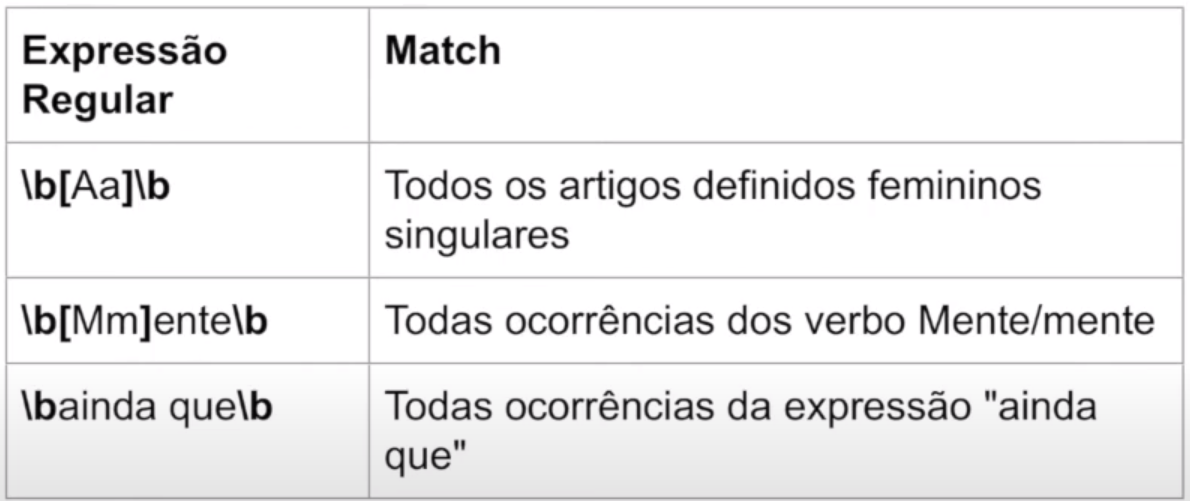

O caracter especial **\b** representa todos os caracteres que marcam o limite de uma palavra
* espaço, pontuação, início e fim de strings

## Quantificadores

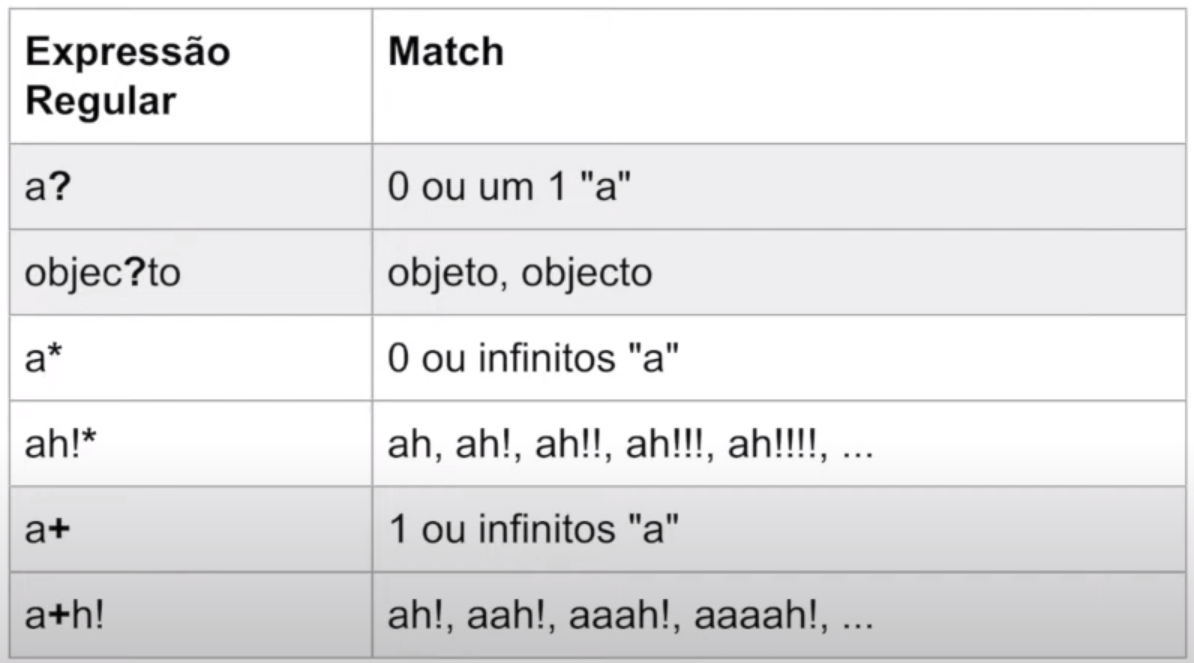

Expressões regulares permitem que busquemos a ocorrência da sequência de um mesmo elemento pela sua frequência com os caracteres especiais **?**, **\***, **+**

### Quantificadores II

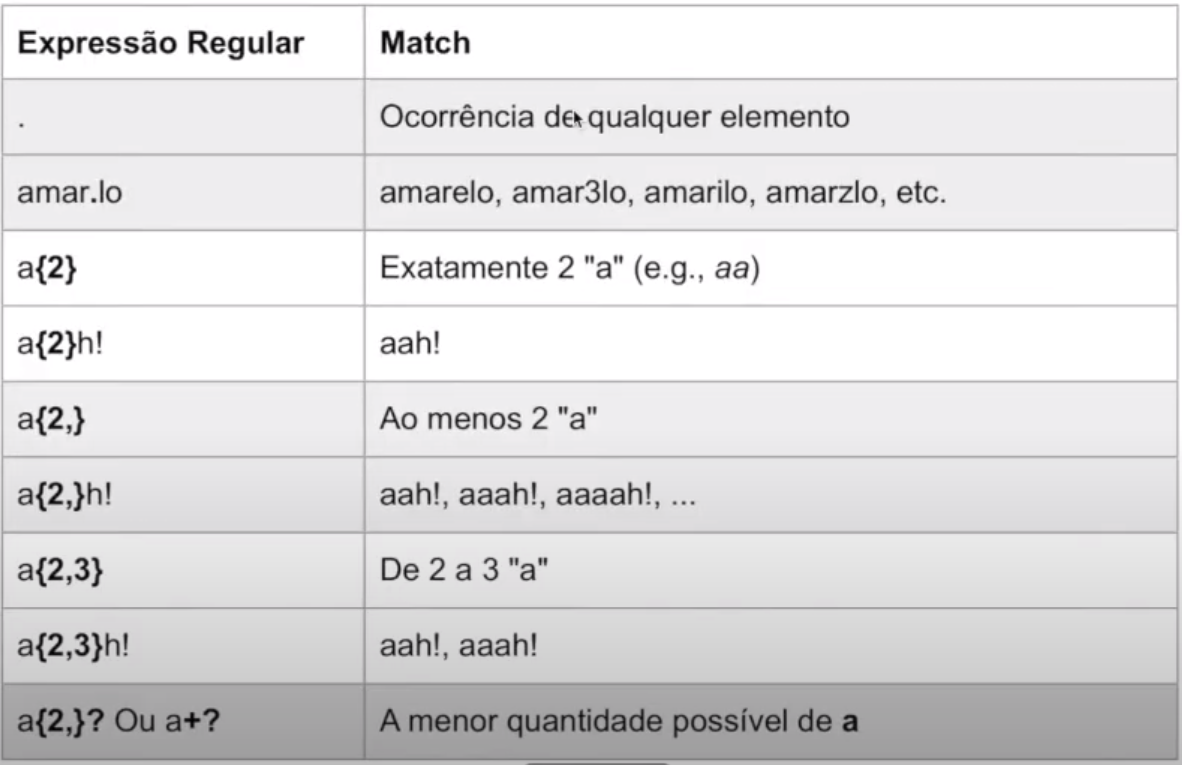

In [5]:
import re

fala = """Pode checar a conta ABC4323?
Emitir segunda via do boleto de Dezembro da conta YIC9834.
Meu nome é Thiago, portador da conta NHD8432. Quantos créditos tenho?"""

re.findall(r"\b[A-Z]{3}[0-9]{4}\b", fala)

['ABC4323', 'YIC9834', 'NHD8432']

In [6]:
import re

numeros = """+55 11 98533-4532
02127-090
02184-746
11 94739-0927
93849-8732
04532-828"""

re.findall(r"\b[0-9]{5}-[0-9]{3}\b", numeros)

['02127-090', '02184-746', '04532-828']

## Agrupamento

**Desafio:** Como retornar os Padrões de risos em mensagens de redes sociais?

**Exemplos:**
* Hahahahaha
* huahuahuahuahua
* Haha
* kkkk

### Agrupamento: Problema

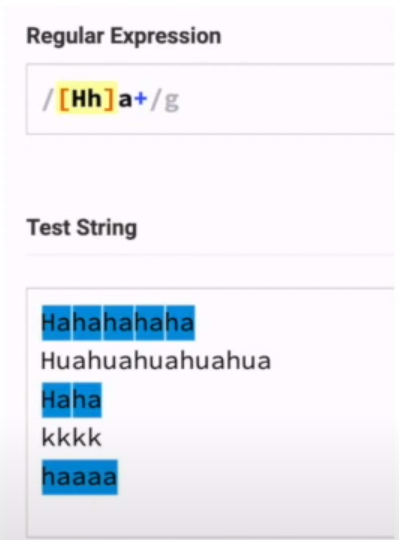

* Quantificadores como **\*** e **+** somente detectam a repetição do token antecedente
* Desta forma, a expressão acima erroneamente detecta as combinações "Ha", "ha", "Haa", "haa", "Haaa", etc. e não "haha", "hahaha" como esperado.

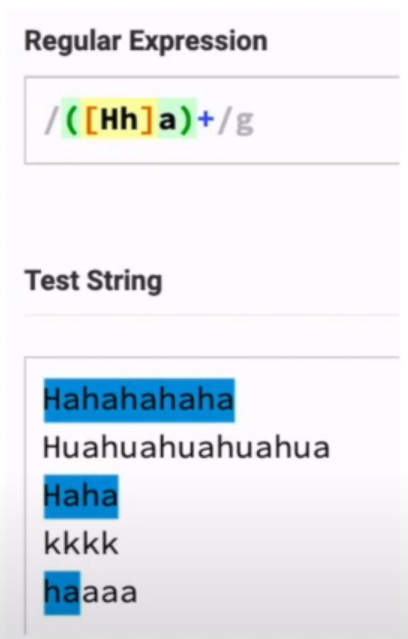

* Para repetição de padrões de mais de um caracter, grupos podem ser criados entre parênteses **()**
* A expressão regular **"([Hh]a)+"** acima é capaz de detectar as sequências "Ha", "ha", "haha", "hahaha", etc.

### Agrupamento em Python

In [7]:
import re

amostras = """Hahahahaha
Huahuahuahuahua
Haha
kkkk
hahahahahaha
"""

regex = re.compile(r"k+|([Hh]a)+|([Hh]ua)+")
iterador = regex.finditer(amostras)

for ex in iterador:
  inicio, fim = ex.span()
  print(inicio, fim, amostras[inicio:fim])

0 10 Hahahahaha
12 27 Huahuahuahuahua
29 33 Haha
34 38 kkkk
39 51 hahahahahaha


* Exemplo anterior em *Python*
* Aqui utilizamos os comandos *.compile* e *.finditer* do Python

## Substituição

In [23]:
import re

texto = """Reconheço que tomei decisões insatisfatórias recentemente, mas posso lhe garantir com absoluta certeza que meu trabalho voltará ao normal."""

re.sub(r"[,;.!?:]", "", texto)

'Reconheço que tomei decisões insatisfatórias recentemente mas posso lhe garantir com absoluta certeza que meu trabalho voltará ao normal'

* Expressões regulares podem ser utilizadas para fazer substituições pontuais num texto.
* Utilizando o comando *re.sub* no Python, o exemplo acima substitui as pontuações do texto por um caractere vazio "".

## Memória

In [8]:
import re

texto = """Reconheço que tomei decisões insatisfatórias recentemente, mas posso lhe garantir com absoluta certeza que meu trabalho voltará ao normal."""

re.sub(r"([,;.!?:])", r" \1", texto)

'Reconheço que tomei decisões insatisfatórias recentemente , mas posso lhe garantir com absoluta certeza que meu trabalho voltará ao normal .'

In [9]:
import re

cep = "02125-000"

re.sub(r"([0-9]{5})-([0-9]{3})", r"\2-\1", cep)

'000-02125'

* Agrupamento da expressão regular podem ser invocados no padrão de substituição pelo símbolo **\\** e o número de sua ocorrência (e.g., \\1, \\2, etc.)
* No exemplo acima, é inserido um espaço entes das pontuações **",;.?!"**

## Caracteres Especiais

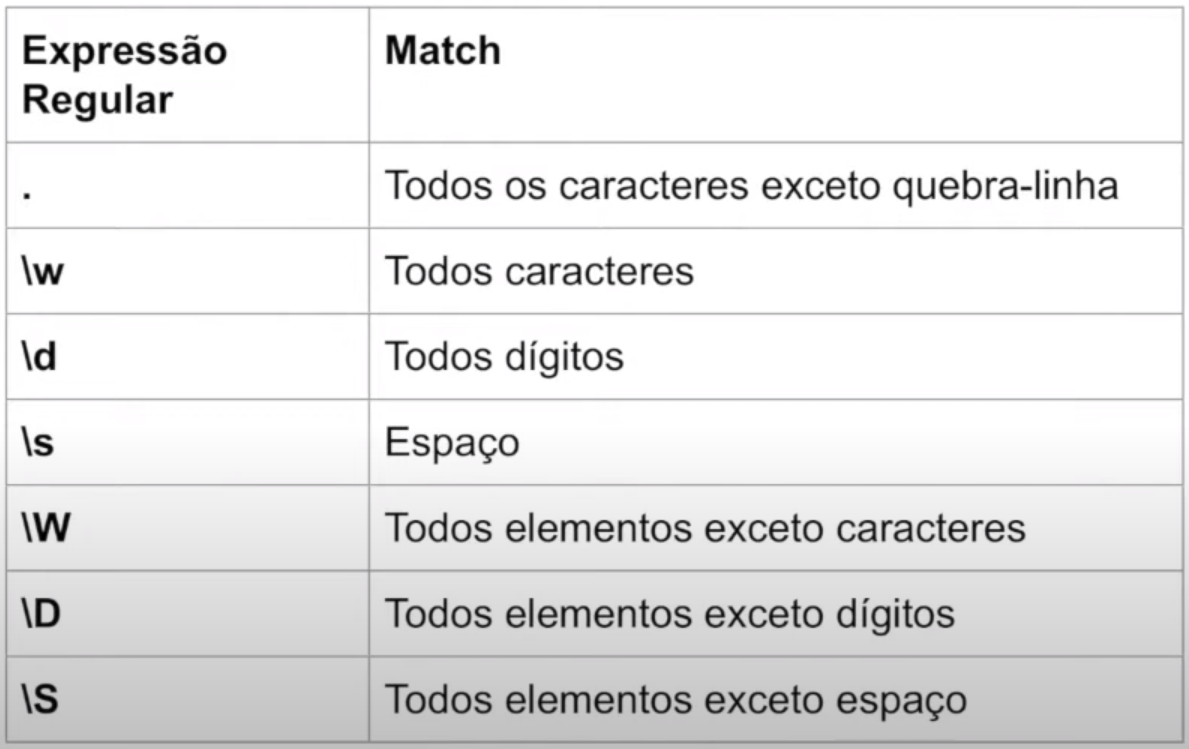

## Avaliação

Como avaliar se uma expressão regular desenvolvida é adequada?
1.   Teste a expressão num corpus de teste no qual os resultados esperados já estejam anotados
2.   Aprimore a expressão regular para diminuir o número de falsos positivos e negativos.
  1. **Falso Positivo:** termo que deveria ser retornado e não foi
  2. **Falso Negativo:** termo que foi retornado e não deveria

**Base de como deve se abaliar qualquer modelo de PLN**





### Avaliação: Exemplo

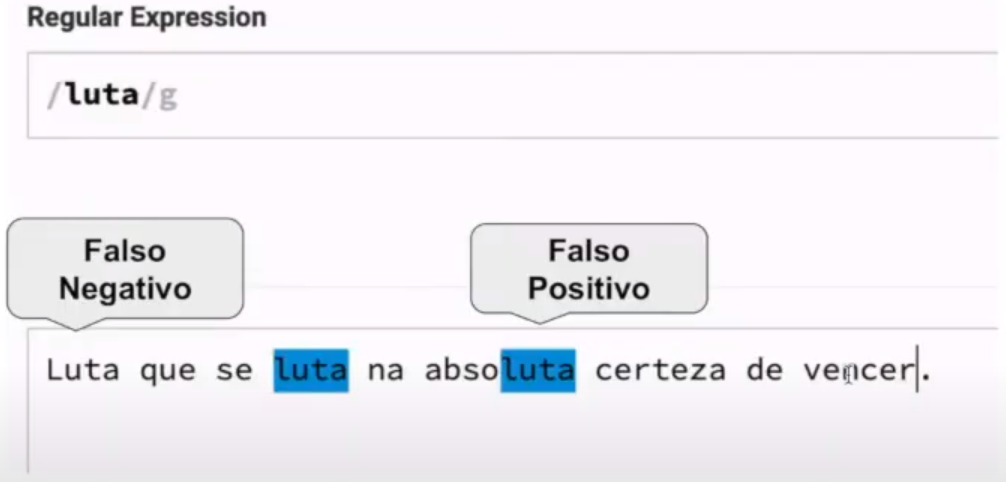

Expressão Regular para detecção do substantivo/verbo "luta".

## Leitura Complementar

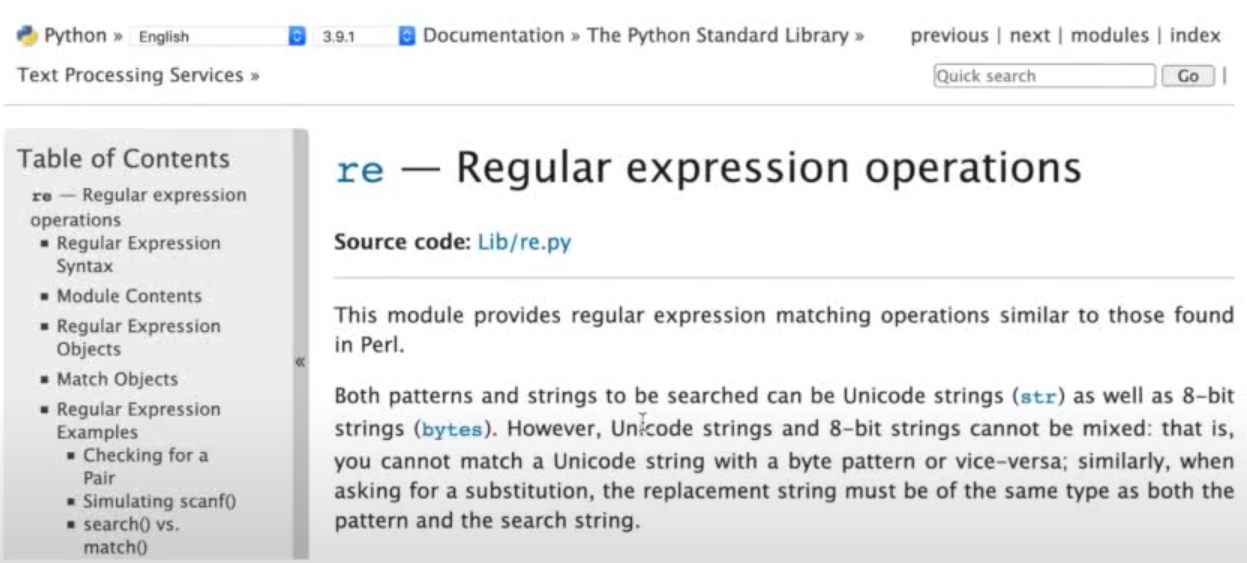

https://docs.python.org/3/library/re.html

## Exercício 1

Expressões Regulares foram a essência dos primeiros mecanismos de busca da Internet. Neste exercício, você deve desenvolver uma função *Python* "busca" que funcione como estes mecanismos. A função deve receber dois parâmetros de entrada: *query*, que representa uma lista de palavras de busca; e *documentos*, que representa uma lista de documentos textuais indexados pelo mecanismo de busca. Com base nestes parâmetros, a função deve retornar todos os textos de *documentos* que contenham todas as palavras da *query*.

In [ ]:
query = ["celular", "android"]

documentos = [
    "TV 27 polegadas Samsung",
    "Celular Android LG",
    "Aspirador Brastemp"
]

def busca(query, documentos):
  resultado = []
  for documento in documentos:
    # expressao regular
    if True:
      resultado.append(documento)
  return resultado

## Exercício 2

Web crawler, também chamado de bot ou web spider, é um algoritmo utilizado por buscadores da internet para automaticamente extrair e indexar informações de páginas da web. Estas páginas são desenvolvidas com a linguagem HTML e seus parágrafos textuais de conteúdo são geralmente definidos entre marcadores \<p>...\</p>, como o exemplo abaixo:

\<p>Olá, LIG948B\</p>

Neste exercício, desenvolva uma função Python "extrair" que receba como entrada uma página web HTML *pagina* e retorne uma lista com o conteúdo textual de todos os parágrafos contigos na página.


## Sumário

Conteúdo da Aula:
* Expressões Regulares